In [1]:
import numpy as np
import matplotlib.pyplot as plt
from NeuralNetwork import NeuralNetwork
%matplotlib inline

5


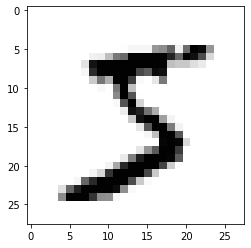

In [19]:

train_file_path = 'D:/books-code/makeyourownneuralnetwork/mnist_dataset/mnist_train_100.csv'
test_file_path = 'D:/books-code/makeyourownneuralnetwork/mnist_dataset/mnist_test_10.csv'

train_file_path = 'D:/books-code/dataset/mnist_train.csv'
test_file_path = 'D:/books-code/dataset/mnist_test.csv'

with open(train_file_path) as train_file:
    train_list = train_file.readlines()

with open(test_file_path) as test_file:
    test_list = test_file.readlines()

def show_img(item):
    all_values = item.split(',')
    label = all_values[0]
    img_array = np.asfarray(all_values[1:]).reshape((28, 28))
    print(label)
    plt.imshow(img_array, cmap='Greys', interpolation='None')

show_img(train_list[0])

In [40]:
n = NeuralNetwork(784, 300, 10, 0.2)


def train(network, item):
    all_values = item.split(',')
    label = int(all_values[0])
    targets = np.zeros(10) + 0.01
    targets[label] = 0.99
    img_array = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
    network.train(img_array, targets)

print('start')
    
epochs = 2

for epoch in range(epochs):
    for train_item in train_list:
        train(n, train_item)

import imageio

nums = [3,4,5,8,9]
for num in nums:
    image_file_path = './assets/{0}.png'.format(num)
    im_array = imageio.imread(image_file_path)
    im_array = im_array[:,:,0].reshape(28*28)
    im_array = (255 - im_array) / 255 * 0.99 + 0.01
    im_out = n.query(im_array)
    print(np.argmax(im_out))
print('finish')

start
3
4
5
8
2
finish


In [ ]:
def test(network, item):
    all_values = item.split(',')
    label = int(all_values[0])
    img_array = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
    out = network.query(img_array)
    return label, np.argmax(out)
        
scorecard = []

for test_item in test_list:
    test_label, test_answer = test(n, test_item)
    if test_label == test_answer:
        scorecard.append(1)
    else:
        scorecard.append(0)

scorecard_array = np.asarray(scorecard)
print('performance=', scorecard_array.sum() / scorecard_array.size)